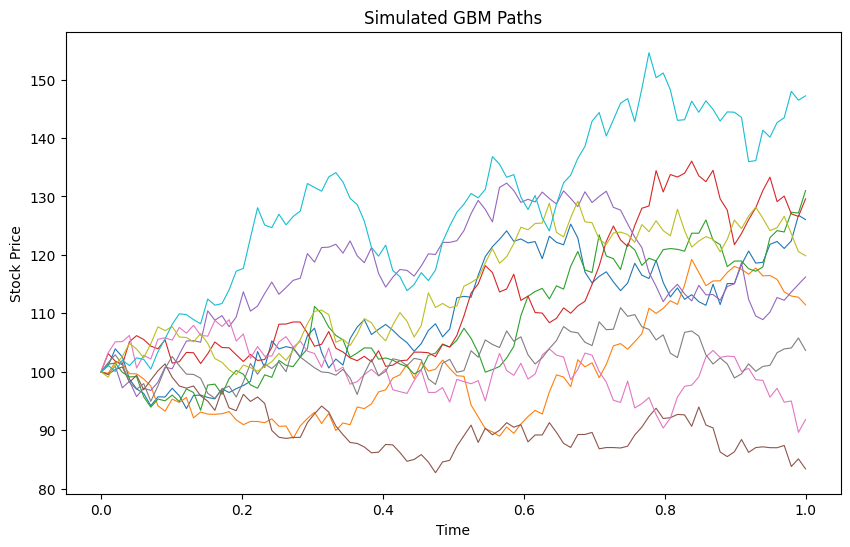

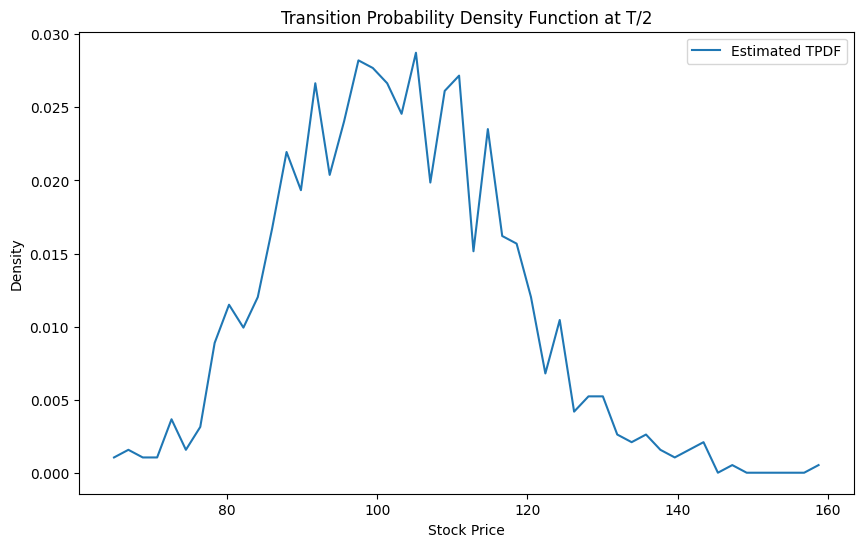

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for GBM
S0 = 100  # Initial stock price
mu = 0.05  # Drift
sigma = 0.2  # Volatility
T = 1.0  # Time to maturity (in years)
dt = 0.01  # Time step
N = int(T / dt)  # Number of steps
n_simulations = 1000  # Number of simulations

# Simulate GBM paths
np.random.seed(42)
time = np.linspace(0, T, N)
paths = np.zeros((n_simulations, N))
paths[:, 0] = S0

for t in range(1, N):
    z = np.random.standard_normal(n_simulations)  # Random normal variables
    paths[:, t] = paths[:, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Plot a few paths
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(time, paths[i], lw=0.8)
plt.title("Simulated GBM Paths")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

# Estimate TPDF at a specific time (e.g., T/2)
time_index = int(N / 2)
prices_at_t = paths[:, time_index]
pdf, bins = np.histogram(prices_at_t, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot the TPDF
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pdf, label="Estimated TPDF")
plt.title("Transition Probability Density Function at T/2")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.show()